In [1]:
from sklearn.datasets import load_boston
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

boston = load_boston()

print(boston.data)
print(boston.data.shape)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
(506, 13)


In [2]:
boston.keys()

['filename', 'data', 'target', 'DESCR', 'feature_names']

In [3]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
bos_df = pd.DataFrame(boston.data)
bos_df.columns = boston.feature_names
bos_df['PRICE'] = boston.target

print(bos_df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  PRICE  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2  


In [5]:
bos_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

/anaconda2/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


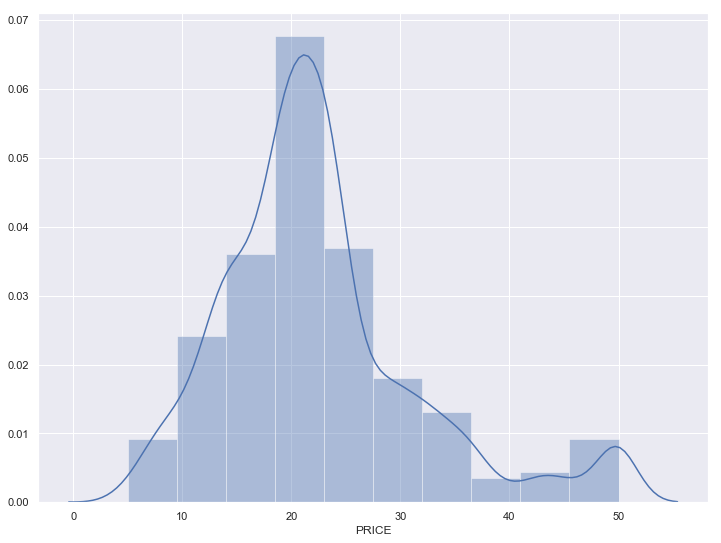

In [6]:
sns.set(rc={'figure.figsize': (12,9)})
sns.distplot(bos_df['PRICE'], bins=10)
plt.show()

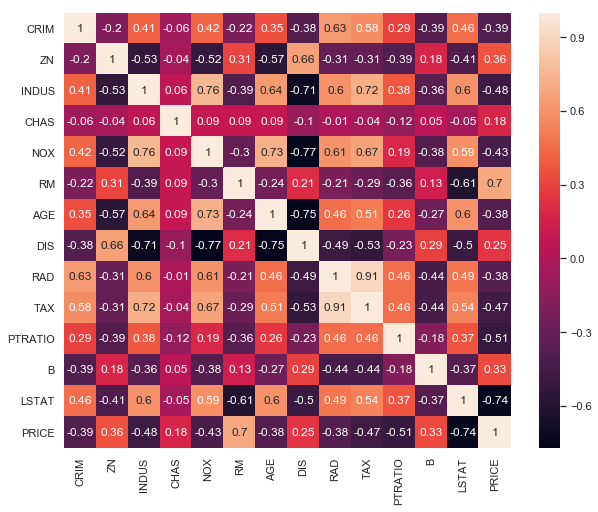

In [7]:
f, ax = plt.subplots(figsize=(10,8))
corr = bos_df.corr().round(2)
sns.heatmap(corr, xticklabels=corr.columns.values,
           yticklabels=corr.columns.values, annot=True)

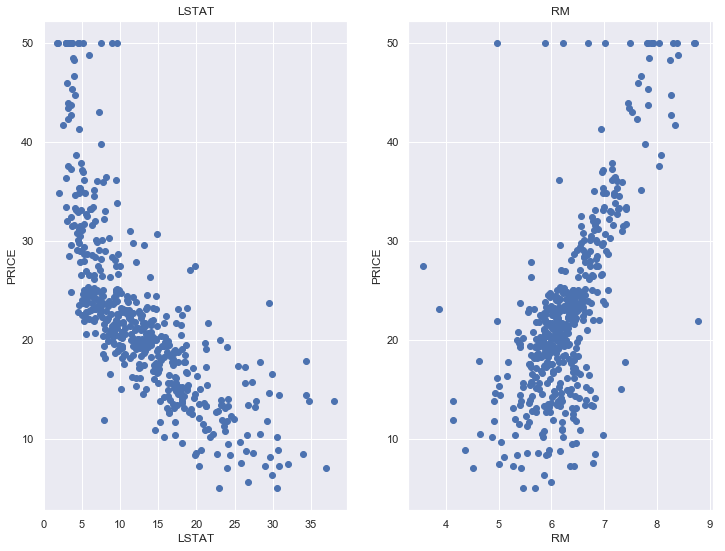

In [8]:
features = ['LSTAT', 'RM']
target = bos_df['PRICE']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x=bos_df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('PRICE')

In [9]:
X1 = bos_df['LSTAT']
X2 = bos_df['RM']

X = np.array(list(zip(X1, X2)))
y = bos_df['PRICE'].values

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(379, 2)
(127, 2)
(379,)
(127,)


In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

price_reg = LinearRegression()
price_reg.fit(X_train, y_train)

print("Coefficient and Intercept")
print(price_reg.coef_)
print(price_reg.intercept_)

Coefficient and Intercept
[-0.67451869  5.01785312]
-0.6047107435077095


In [13]:
y_train_predict = price_reg.predict(X_train)
r2 = r2_score(y_train, y_train_predict)
mse = np.sqrt(mean_squared_error(y_train, y_train_predict))
print("Price Predictions for training set")
print(y_train_predict)

print("Model Scores for test set")
print('R2 = {}'.format(r2))
print('Mean Squared Error = {}'.format(mse))

Price Predictions for training set
[15.068741   22.9170424  31.77918983 20.31805685 16.03053212 17.22855177
 19.14187166 18.29856396 32.52527165 22.59518002  8.41615841 28.68038394
 12.08538831 15.42984442 19.96437787 31.02032986 28.50507226 26.29904518
 18.57444766 32.19606313 31.66270092 15.95521144  5.09257935 29.62642988
 28.14584247  1.36970595 26.98798351 19.74355181 27.88120944 17.21259161
 17.58795326 18.63570998 13.16634829 12.42410232 23.06356014 31.26364904
 33.04639349 29.61224239 21.29179576 24.51434607 27.73843414 26.24501295
 17.90701001 29.57879943  9.20772165 21.50742196 27.04701849 19.85702562
 15.93037217 17.15448108 12.18219248 26.55501614 23.71874986 20.06534345
 20.72200295 22.23478608 20.91840389 16.09296133 28.23854775 26.91808453
 28.64837778 35.6884889  20.74949881 15.63064439 28.57276383 31.07191499
 20.26517639 34.74717303 26.37241394 26.05501379 18.76215631 26.08096432
 35.72647513 26.21622657 18.88757241 32.23253906 31.42983915 11.40310932
 25.49643113 20.

In [14]:
y_test_predict = price_reg.predict(X_test)
r2 = r2_score(y_test, y_test_predict)
mse = np.sqrt(mean_squared_error(y_test, y_test_predict))
print("Price Predictions for test set")
print(y_test_predict)

print("Model Scores for test set")
print('R2 = {}'.format(r2))
print('Mean Squared Error = {}'.format(mse))

Price Predictions for test set
[26.22238591 24.15810116 24.29162097 12.90055111 22.34298929 22.95627108
 21.30247295 23.07555807 15.8231566  24.36450484 15.37806492 18.4858509
 19.21380842  3.66295343 37.24950345 31.52877451 23.47239772 33.20834872
 28.64697119 22.83420112 26.78347886 20.78580578 20.635707   27.07122382
 21.01989488  9.78792173 19.99818966 17.39156262 37.04462243 18.43652607
 18.26913884 19.99342936 23.7900781  21.61507229 25.49218594 18.63893731
 11.38031057 22.88545039 19.35011119 14.05939977 24.35230499 18.88414797
 24.09360396 14.39140912 26.37746202 25.44982334 17.76428279 19.95098846
  4.24117069 26.79642116 20.13385095 15.97498752 21.54892605 38.44994205
 16.60715116 18.34873768 19.64289186 20.44443518 21.46368573 17.6527561
 23.66583644 21.48280248 31.15177894 29.73607265 18.10638829 29.21652911
 20.82988542 17.60023141 20.43563917 21.62344385 22.8284003  24.9073169
 27.80758312 30.77848047 28.04502318  2.90670198 38.11317515 23.73875809
 25.65234309 18.9580167

In [ ]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X_minmax = min_max_scaler.fit_transform(X_train)

s_scaler = preprocessing.StandardScaler()
X_scaler = s_scaler.fit_transform(X_train)

## References

[Linear Regression on Boston Housing Dataset](https://towardsdatascience.com/linear-regression-on-boston-housing-dataset-f409b7e4a155)

[Data Science 2.1- Machine Learning](https://github.com/Make-School-Courses/DS-2.1-Machine-Learning)

[sklearn.metrics.mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

[Scale, Standardize, or Normalize with Scikit-Learn](https://towardsdatascience.com/scale-standardize-or-normalize-with-scikit-learn-6ccc7d176a02)